# Importation des données

In [ ]:
!git clone https://github.com/axelcarlier/animals.git

In [1]:
import PIL
from PIL import Image
import numpy as np
import os
import re

# Chemin vers la base de données
path = "./animals/unlabelled/"
# Indice d'ajout de données dans les variables x et y 
i = 0
# Préparation des structures de données pour x et y
x = np.zeros((50000, 64, 64, 3))

# Parcours des fichiers (classés) du répertoire
dirs = os.listdir(path)

# Trier les fichiers par nom alphanumérique
def sorted_alphanumeric(data):
    convert = lambda text: int(text) if text.isdigit() else text.lower()
    alphanum_key = lambda key: [ convert(c) for c in re.split('([0-9]+)', key) ] 
    return sorted(data, key=alphanum_key)
dirs = sorted_alphanumeric(dirs)

for item in dirs:
  # Image : on va remplir la variable x
  # Lecture de l'image
  img = Image.open(path + item)
  # Remplissage de la variable x
  x[i] = np.asarray(img)
  i = i+1

x = x.astype('uint8')

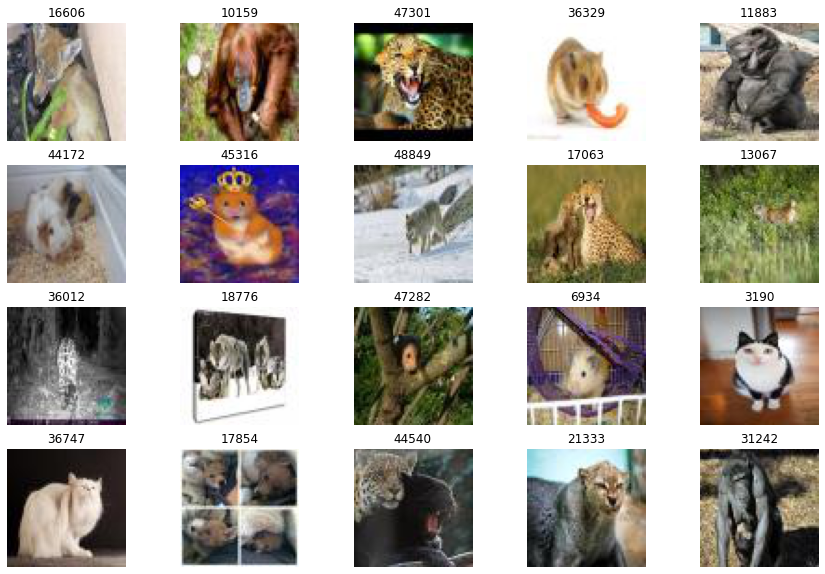

In [2]:
# Visualiser la base de données
import matplotlib.pyplot as plt
from PIL import Image

fig = plt.figure(figsize=(15, 10))

for i in range(20):
  num = np.random.randint(x.shape[0])
  plt.subplot(4, 5, i+1)
  plt.imshow(x[num]);
  plt.title(str(num+1))
  plt.axis('off')
plt.show()


In [3]:
from math import sqrt, floor

def afficher_liste(liste) :
    """
    Entrée : liste est de la forme : [34, 728, 612, 555] où chaque nombre est le numéro de l'image
    Sortie : rien
    Affiche les images présentes dans liste
    """
    taille = len(liste)
    sqrtaille = sqrt(taille)
    fig = plt.figure(figsize=(3*floor(sqrtaille)+1, 3*floor(sqrtaille)+1))
    for i,num in enumerate(liste) :
        plt.subplot(floor(sqrtaille)+1, floor(sqrtaille)+1, i+1)
        plt.imshow(x[num-1]);
        plt.title(str(num))
        plt.axis('off')
    plt.show()

In [4]:
def afficher_txt(file_txt):
    """
    Entrée : file_txt est un fichier texte dont chaque ligne est un nombre entre 1 et 50000
    Sortie : rien
    Affiche les images dont les numéros sont présents dans le fichier texte
    """
    file = open(file_txt,'r')
    lignes = file.readlines()
    liste = []
    for ligne in lignes :
        liste.append(int(ligne.rstrip("\n")))
    afficher_liste(liste)

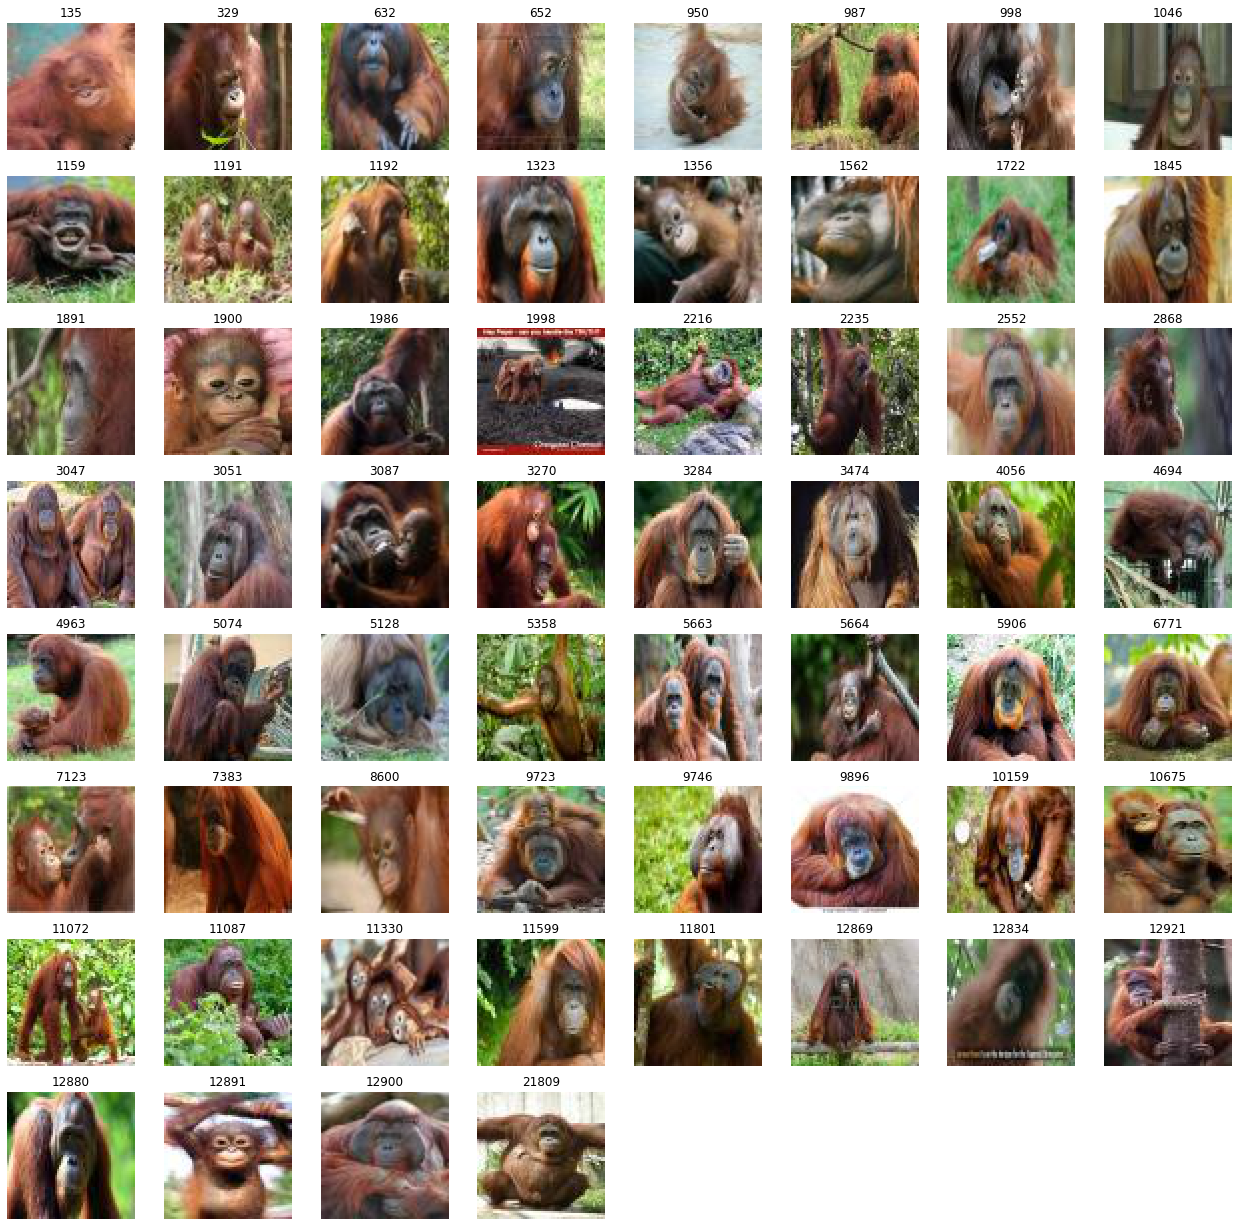

In [7]:
afficher_txt("imagestolabel/orang_outan.txt")

In [10]:
i = 6001

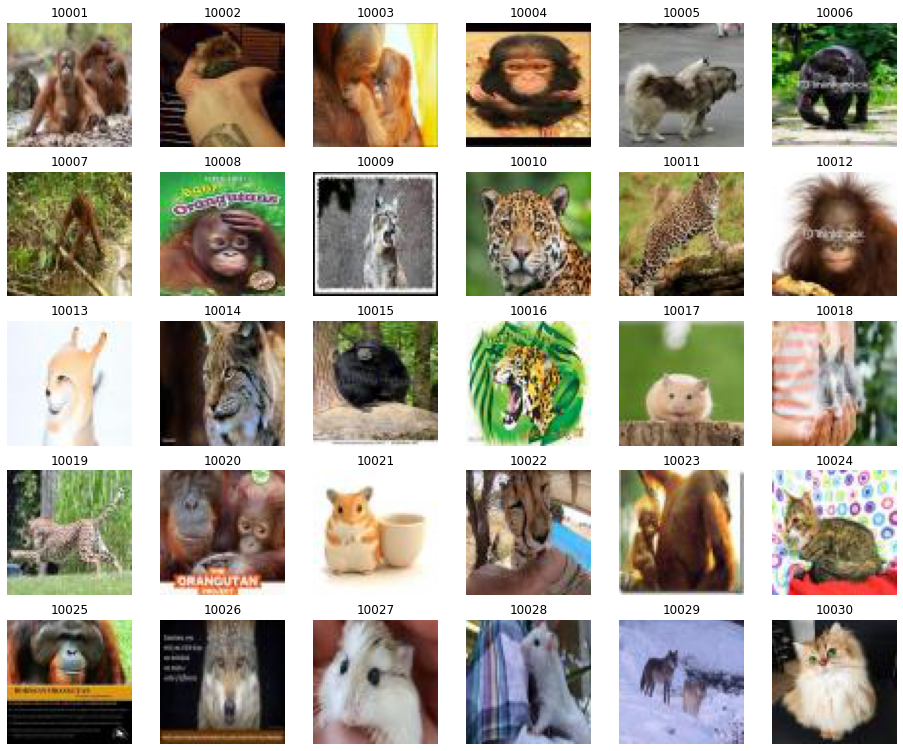

In [9]:
afficher_liste(list(range(i,i+30)))
i += 31